Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset.
Example – predict sentiments based on product reviews b) Apply for predic

In [ ]:
!pip install torch pandas matplotlib scikit-learn tqdm seaborn


In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm


In [3]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1])
data = df.values.astype('float32')

# Normalize
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len]
        y = data[i+seq_len]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_len = 12
X, y = create_sequences(data, seq_len)

# Use ~1k samples
X = X[:1000]
y = y[:1000]

# Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Convert to tensors
# Convert to tensors and reshape for LSTM: [batch, seq_len, 1]
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, seq_len, 1)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32).reshape(-1, seq_len, 1)
y_test = torch.tensor(y_test, dtype=torch.float32)



In [4]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # use last time step
        return out


In [5]:
model = LSTMRegressor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [6]:
epochs = 50
train_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for i in tqdm(range(len(X_train)), desc=f"Epoch {epoch+1}/{epochs}"):
        seq = X_train[i].unsqueeze(0)  # shape: (1, seq_len, 1)
        target = y_train[i].unsqueeze(0)

        optimizer.zero_grad()
        output = model(seq)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(X_train)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1/50: 100%|██████████| 105/105 [00:00<00:00, 407.70it/s]


Epoch 1, Loss: 0.0115


Epoch 2/50: 100%|██████████| 105/105 [00:00<00:00, 466.37it/s]


Epoch 2, Loss: 0.0206


Epoch 3/50: 100%|██████████| 105/105 [00:00<00:00, 467.68it/s]


Epoch 3, Loss: 0.0215


Epoch 4/50: 100%|██████████| 105/105 [00:00<00:00, 472.35it/s]


Epoch 4, Loss: 0.0240


Epoch 5/50: 100%|██████████| 105/105 [00:00<00:00, 423.22it/s]


Epoch 5, Loss: 0.0239


Epoch 6/50: 100%|██████████| 105/105 [00:00<00:00, 430.42it/s]


Epoch 6, Loss: 0.0215


Epoch 7/50: 100%|██████████| 105/105 [00:00<00:00, 428.55it/s]


Epoch 7, Loss: 0.0221


Epoch 8/50: 100%|██████████| 105/105 [00:00<00:00, 429.87it/s]


Epoch 8, Loss: 0.0205


Epoch 9/50: 100%|██████████| 105/105 [00:00<00:00, 452.66it/s]


Epoch 9, Loss: 0.0163


Epoch 10/50: 100%|██████████| 105/105 [00:00<00:00, 462.63it/s]


Epoch 10, Loss: 0.0124


Epoch 11/50: 100%|██████████| 105/105 [00:00<00:00, 428.29it/s]


Epoch 11, Loss: 0.0096


Epoch 12/50: 100%|██████████| 105/105 [00:00<00:00, 431.77it/s]


Epoch 12, Loss: 0.0077


Epoch 13/50: 100%|██████████| 105/105 [00:00<00:00, 434.64it/s]


Epoch 13, Loss: 0.0063


Epoch 14/50: 100%|██████████| 105/105 [00:00<00:00, 366.43it/s]


Epoch 14, Loss: 0.0053


Epoch 15/50: 100%|██████████| 105/105 [00:00<00:00, 462.48it/s]


Epoch 15, Loss: 0.0046


Epoch 16/50: 100%|██████████| 105/105 [00:00<00:00, 423.83it/s]


Epoch 16, Loss: 0.0039


Epoch 17/50: 100%|██████████| 105/105 [00:00<00:00, 412.95it/s]


Epoch 17, Loss: 0.0033


Epoch 18/50: 100%|██████████| 105/105 [00:00<00:00, 431.17it/s]


Epoch 18, Loss: 0.0029


Epoch 19/50: 100%|██████████| 105/105 [00:00<00:00, 452.44it/s]


Epoch 19, Loss: 0.0027


Epoch 20/50: 100%|██████████| 105/105 [00:00<00:00, 446.10it/s]


Epoch 20, Loss: 0.0025


Epoch 21/50: 100%|██████████| 105/105 [00:00<00:00, 449.65it/s]


Epoch 21, Loss: 0.0023


Epoch 22/50: 100%|██████████| 105/105 [00:00<00:00, 458.48it/s]


Epoch 22, Loss: 0.0022


Epoch 23/50: 100%|██████████| 105/105 [00:00<00:00, 442.78it/s]


Epoch 23, Loss: 0.0021


Epoch 24/50: 100%|██████████| 105/105 [00:00<00:00, 434.46it/s]


Epoch 24, Loss: 0.0020


Epoch 25/50: 100%|██████████| 105/105 [00:00<00:00, 433.03it/s]


Epoch 25, Loss: 0.0019


Epoch 26/50: 100%|██████████| 105/105 [00:00<00:00, 414.97it/s]


Epoch 26, Loss: 0.0018


Epoch 27/50: 100%|██████████| 105/105 [00:00<00:00, 388.83it/s]


Epoch 27, Loss: 0.0017


Epoch 28/50: 100%|██████████| 105/105 [00:00<00:00, 428.87it/s]


Epoch 28, Loss: 0.0016


Epoch 29/50: 100%|██████████| 105/105 [00:00<00:00, 427.01it/s]


Epoch 29, Loss: 0.0014


Epoch 30/50: 100%|██████████| 105/105 [00:00<00:00, 392.61it/s]


Epoch 30, Loss: 0.0015


Epoch 31/50: 100%|██████████| 105/105 [00:00<00:00, 409.67it/s]


Epoch 31, Loss: 0.0015


Epoch 32/50: 100%|██████████| 105/105 [00:00<00:00, 427.82it/s]


Epoch 32, Loss: 0.0014


Epoch 33/50: 100%|██████████| 105/105 [00:00<00:00, 426.48it/s]


Epoch 33, Loss: 0.0020


Epoch 34/50: 100%|██████████| 105/105 [00:00<00:00, 393.98it/s]


Epoch 34, Loss: 0.0017


Epoch 35/50: 100%|██████████| 105/105 [00:00<00:00, 361.14it/s]


Epoch 35, Loss: 0.0017


Epoch 36/50: 100%|██████████| 105/105 [00:00<00:00, 426.65it/s]


Epoch 36, Loss: 0.0017


Epoch 37/50: 100%|██████████| 105/105 [00:00<00:00, 430.73it/s]


Epoch 37, Loss: 0.0016


Epoch 38/50: 100%|██████████| 105/105 [00:00<00:00, 423.58it/s]


Epoch 38, Loss: 0.0021


Epoch 39/50: 100%|██████████| 105/105 [00:00<00:00, 461.85it/s]


Epoch 39, Loss: 0.0015


Epoch 40/50: 100%|██████████| 105/105 [00:00<00:00, 433.24it/s]


Epoch 40, Loss: 0.0014


Epoch 41/50: 100%|██████████| 105/105 [00:00<00:00, 453.90it/s]


Epoch 41, Loss: 0.0018


Epoch 42/50: 100%|██████████| 105/105 [00:00<00:00, 448.47it/s]


Epoch 42, Loss: 0.0023


Epoch 43/50: 100%|██████████| 105/105 [00:00<00:00, 449.08it/s]


Epoch 43, Loss: 0.0015


Epoch 44/50: 100%|██████████| 105/105 [00:00<00:00, 463.01it/s]


Epoch 44, Loss: 0.0017


Epoch 45/50: 100%|██████████| 105/105 [00:00<00:00, 449.80it/s]


Epoch 45, Loss: 0.0014


Epoch 46/50: 100%|██████████| 105/105 [00:00<00:00, 377.62it/s]


Epoch 46, Loss: 0.0014


Epoch 47/50: 100%|██████████| 105/105 [00:00<00:00, 403.89it/s]


Epoch 47, Loss: 0.0015


Epoch 48/50: 100%|██████████| 105/105 [00:00<00:00, 425.18it/s]


Epoch 48, Loss: 0.0019


Epoch 49/50: 100%|██████████| 105/105 [00:00<00:00, 428.66it/s]


Epoch 49, Loss: 0.0015


Epoch 50/50: 100%|██████████| 105/105 [00:00<00:00, 367.38it/s]

Epoch 50, Loss: 0.0012


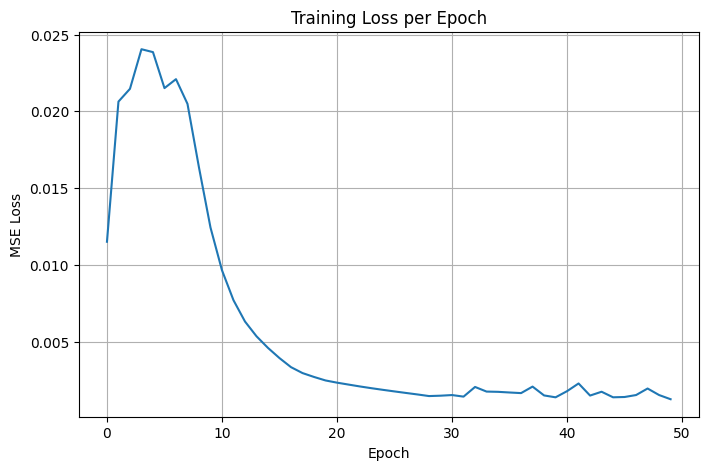

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


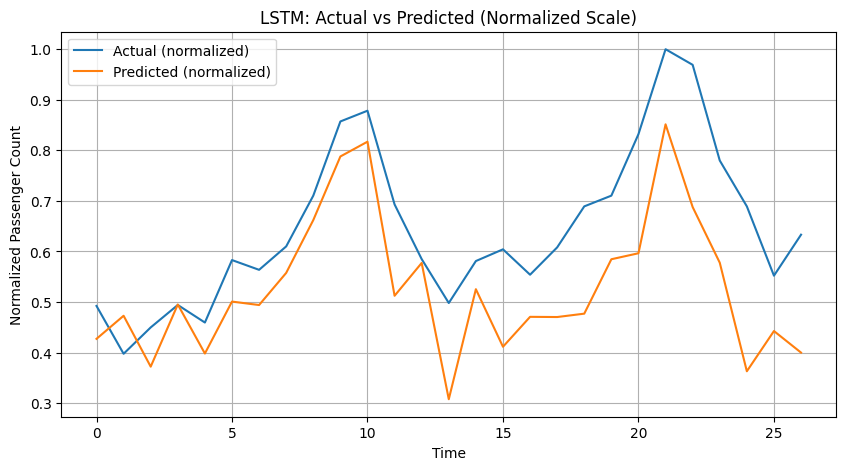

In [9]:
# Evaluate the model and collect predictions
model.eval()
predictions = []

with torch.no_grad():
    for i in range(len(X_test)):
        seq = X_test[i].unsqueeze(0)
        pred = model(seq)
        predictions.append(pred.item())

# Convert targets to a list for plotting
actual = [y.item() for y in y_test]

# Plot predictions vs actual (normalized scale)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual, label="Actual (normalized)")
plt.plot(predictions, label="Predicted (normalized)")
plt.title("LSTM: Actual vs Predicted (Normalized Scale)")
plt.xlabel("Time")
plt.ylabel("Normalized Passenger Count")
plt.legend()
plt.grid(True)
plt.show()
